uses conventions from Keras functional API

built from https://blog.keras.io/building-autoencoders-in-keras.html


2021-11-04 18:13:47.676990: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 784)
(10000, 784)


2021-11-04 18:13:48.528459: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0473 - val_loss: 0.0272
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 0.0212
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0207 - val_loss: 0.0194
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0190
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.0185
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.0184
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0175
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0174
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0171

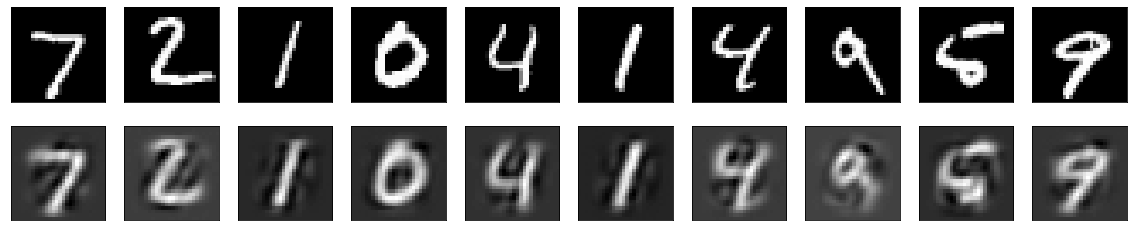

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# this is the size of our encoded representations (reduced dimensionality)
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='linear')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# compile model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# prepare inputs (from MNIST databse)
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# normalize images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()